In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\CHOI.DESKTOP-R51MDOU\OneDrive - 가천대학교\바탕 화면\Coding\AI Introduction\kc_house_data.csv'
df = pd.read_csv(file_path)

#데이터 시각화
display(df)
print(df.columns)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [20]:
missing_values = df.isnull().sum()

print(missing_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [21]:
df.drop(columns = ['id', 'date'], inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [23]:
#특성과 타겟 분리 (특성 : X, 타겟 : y)
X = df.drop('price', axis = 1)
y = df['price']

#trained data와 test data 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
#원-핫 엔코딩 
Y = pd.get_dummies(y).values

In [25]:
X = X.values

In [35]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

# 신경망 생성 --> 뉴런 갯수, active 방식.
model.add(Dense(20, input_shape = (18,), activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(Adam(learning_rate = 0.01), 'mse')

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 20)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261 (8.83 KB)

 Trainable params: 2,261 (8.83 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#예측 시작
model_history = model.fit(x = X_train, y = y_train, epochs = 20, batch_size = 23, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

print("예측값:", y_pred)
print("실제값:", y_test)

Epoch 1/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 133639045120.0000 - val_loss: 69732360192.0000
Epoch 2/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 57996525568.0000 - val_loss: 79336546304.0000
Epoch 3/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 55888207872.0000 - val_loss: 73070829568.0000
Epoch 4/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 58063839232.0000 - val_loss: 64981069824.0000
Epoch 5/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 53765849088.0000 - val_loss: 61839818752.0000
Epoch 6/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 55009005568.0000 - val_loss: 77621182464.0000
Epoch 7/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 62117527552.0000 - val_loss: 67952279552.0000
Epoch 8/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 58417291264.0000 - val_loss: 63593504768.0000
Epoch 9/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 55780343808.0000 - val_loss: 65265745920.0000
Epoch 10/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 62435794944.0000
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


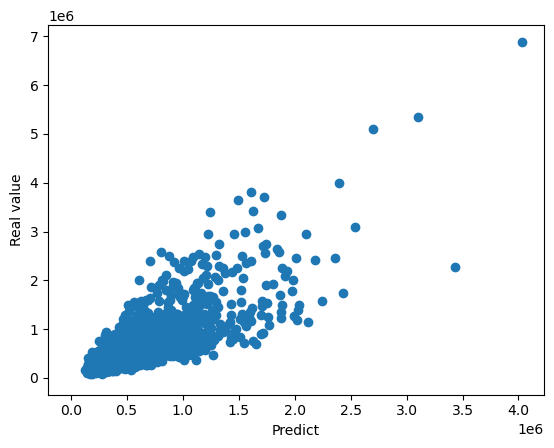

In [40]:
model.evaluate(X_test, y_test)
pred = model.predict(X_test)
real = y_test
plt.scatter(pred, real)
plt.plot([0,1],[0,1],"r-")
plt.xlabel("Predict value")
plt.ylabel("Real value")
plt.show()